# Libraries

In [5]:
# install.packages('')

In [6]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(MASS)

# Read data

In [2]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 9 - Dimensionality Reduction/Section 44 - Linear Discriminant Analysis (LDA)"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Wine.csv')
str(df)

'data.frame':	178 obs. of  14 variables:
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Ash_Alcanity        : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280               : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Prol

# Scale

In [3]:
df[,names(df)!="Customer_Segment"]=scale(df[,names(df)!="Customer_Segment"])
str(df)

'data.frame':	178 obs. of  14 variables:
 $ Alcohol             : num  1.514 0.246 0.196 1.687 0.295 ...
 $ Malic_Acid          : num  -0.5607 -0.498 0.0212 -0.3458 0.2271 ...
 $ Ash                 : num  0.231 -0.826 1.106 0.487 1.835 ...
 $ Ash_Alcanity        : num  -1.166 -2.484 -0.268 -0.807 0.451 ...
 $ Magnesium           : num  1.9085 0.0181 0.0881 0.9283 1.2784 ...
 $ Total_Phenols       : num  0.807 0.567 0.807 2.484 0.807 ...
 $ Flavanoids          : num  1.032 0.732 1.212 1.462 0.661 ...
 $ Nonflavanoid_Phenols: num  -0.658 -0.818 -0.497 -0.979 0.226 ...
 $ Proanthocyanins     : num  1.221 -0.543 2.13 1.029 0.4 ...
 $ Color_Intensity     : num  0.251 -0.292 0.268 1.183 -0.318 ...
 $ Hue                 : num  0.361 0.405 0.317 -0.426 0.361 ...
 $ OD280               : num  1.843 1.11 0.786 1.181 0.448 ...
 $ Proline             : num  1.0102 0.9625 1.3912 2.328 -0.0378 ...
 $ Customer_Segment    : int  1 1 1 1 1 1 1 1 1 1 ...


# Train/test

In [4]:
set.seed(123)
split=sample.split(df$Customer_Segment, SplitRatio=0.8)
training_set_all=subset(df,split)
test_set_all=subset(df,!split)
writeLines(noquote(paste('Training set:',paste(dim(training_set_all),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set_all),collapse='x'))))

Training set: 142x14
Test set: 36x14


# LDA

In [11]:
lda=lda(formula=Customer_Segment~.,data=training_set_all)
training_set=as.data.frame(predict(lda,training_set_all))[c('x.LD1','x.LD2','class')]
test_set=as.data.frame(predict(lda,test_set_all))[c('x.LD1','x.LD2','class')]
writeLines(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

Training set: 142x3
Test set: 36x3


# Support Vector Machines

In [12]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

In [16]:
X_plot=range_plot_X(training_set$x.LD1,1000,0.1)
Y_plot=range_plot_X(training_set$x.LD2,1000,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('x.LD1','x.LD2')

In [14]:
svm_classifier=svm(formula=class~.,data=training_set,
               type='C-classification',kernel='linear')
writeLines('\nClassifier summary:')
print(summary(svm_classifier))


Classifier summary:

Call:
svm(formula = class ~ ., data = training_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  19

 ( 5 8 6 )


Number of Classes:  3 

Levels: 
 1 2 3





Confusion matrix (train):
   y_pred
     1  2  3
  1 47  0  0
  2  0 57  0
  3  0  1 37


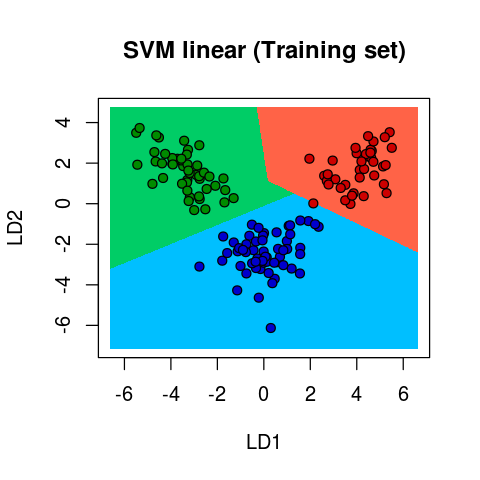

In [18]:
writeLines('Confusion matrix (train):')
y_pred=predict(svm_classifier,newdata=training_set)
print(table(training_set$class,y_pred))
y_pred_grid=predict(svm_classifier,newdata=XY_grid)
plot(training_set[c('x.LD1','x.LD2')],
     main='SVM linear (Training set)',
     xlab='LD1',ylab='LD2',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==2,'deepskyblue',
                                  ifelse(y_pred_grid==1,'springgreen3','tomato')))
points(training_set[c('x.LD1','x.LD2')],pch=21,
       bg=ifelse(training_set$class==2,'blue3',
                 ifelse(training_set$class==1,'green4','red3')))


Confusion matrix (test):
   y_pred
     1  2  3
  1 12  0  0
  2  1 13  0
  3  0  0 10


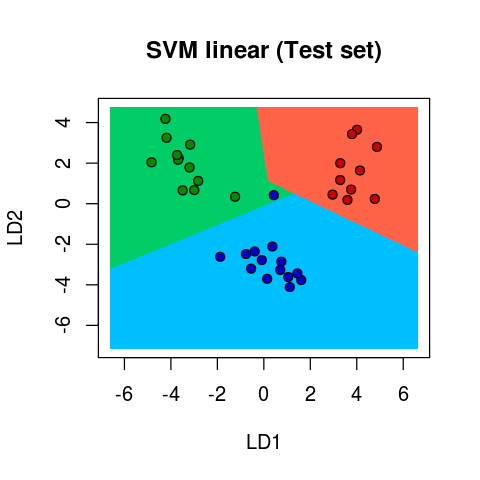

In [19]:
writeLines('\nConfusion matrix (test):')
y_pred=predict(svm_classifier,newdata=test_set)
print(table(test_set$class,y_pred))
y_pred_grid=predict(svm_classifier,newdata=XY_grid)
plot(training_set[c('x.LD1','x.LD2')],
     main='SVM linear (Test set)',
     xlab='LD1',ylab='LD2',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==2,'deepskyblue',
                                  ifelse(y_pred_grid==1,'springgreen3','tomato')))
points(test_set[c('x.LD1','x.LD2')],pch=21,
       bg=ifelse(test_set$class==2,'blue3',
                 ifelse(test_set$class==1,'green4','red3')))